In [ ]:
import tensorflow as tf

# Números de 0 a 9
mnist = tf.keras.datasets.mnist

# Criadas váriaveis de treino e teste
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# Normalização dos dados
x_train, x_test = x_train / 255.0, x_test / 255.0

# Definição da rede neural
#
# Flatten: transforma a matriz de pixels em um vetor
# Dense: define a quantidade de neurônios
# Dropout: tira 20% dos neurônios em cada iteração
# Dense: Define o valor de saída de 0 a 9
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Compila o modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Irá treinar 5 vezes com as imagens de treino
model.fit(x_train, y_train, epochs=5)

11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2170 - accuracy: 0.9357
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0966 - accuracy: 0.9700
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0696 - accuracy: 0.9781
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0525 - accuracy: 0.9830
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0416 - accuracy: 0.9870


In [ ]:
# Irá printar a porcentagem de acerto ao tentar prever as imagens de teste
print("Porcentagem de acerto: {:.2%}".format(model.evaluate(x_test, y_test)[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.0706 - accuracy: 0.9787
Porcentagem de acerto: 97.87%


In [ ]:
# Irá printar o modelo
model.summary()

Predição: 6


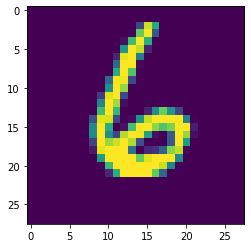

In [ ]:
# Número da imagem que se deseja prever
index = 2458

# Desenha imagem com matplotlib
import matplotlib.pyplot as plt
plt.imshow(x_test[index])

# Imprime a predição feita
import numpy as np
print("Predição:", np.argmax(model.predict(np.array([x_test[index]]))))

Predição: 2


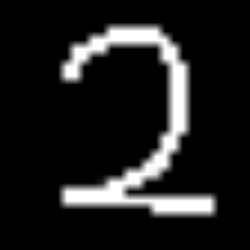

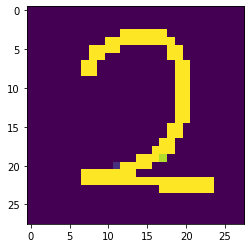

In [ ]:
# Prevendo nossas imagens
import cv2 ## pip install opencv-python
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Local da imagem no notebook
image = './predict/2.png'

# Carregando imagem
img = cv2.imread(image, cv2.IMREAD_GRAYSCALE)

# Redimensionando para 28x28 (padrão mnist)
resized = cv2.resize(img, (28,28), interpolation = cv2.INTER_CUBIC)
#resized = cv2.resize(img, (28,28), interpolation = cv2.INTER_CUBIC)

# Predição
print("Predição:", np.argmax(model.predict(np.array([resized]))))
cv2_imshow(cv2.resize(resized, (250,250)))
plt.imshow(resized)